In [ ]:
import findspark
findspark.init()

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, sum as spark_sum, max as spark_max, datediff, lit
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
spark = SparkSession.builder.appName("RFM_KMeans").getOrCreate()

df1 = pd.read_csv('Transactions.csv', parse_dates=['Date'])
df2 = pd.read_csv('Products_with_Categories.csv')
df = pd.merge(df1, df2, on='productId', how='left').fillna(0)
#  Chuyển đổi Pandas DataFrame thành PySpark DataFrame
df_spark = spark.createDataFrame(df)

C:\Users\Thu\AppData\Local\Temp\ipykernel_14084\1423222255.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1 = pd.read_csv('Transactions.csv', parse_dates=['Date'])


In [3]:
df_spark = df_spark.withColumn("Date", col("Date").cast("date"))
max_date = df_spark.select(spark_max("Date")).collect()[0][0]

df_spark = df_spark.withColumn("gross_sales", col("price") * col("items"))

Py4JJavaError: An error occurred while calling o54.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 0.0 failed 1 times, most recent failure: Lost task 3.0 in stage 0.0 (TID 3) (ThuNguyen.fritz.box executor driver): java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1128)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1071)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:181)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessImpl.create(Native Method)
	at java.base/java.lang.ProcessImpl.<init>(ProcessImpl.java:492)
	at java.base/java.lang.ProcessImpl.start(ProcessImpl.java:153)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1107)
	... 36 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1128)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1071)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:181)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.base/java.lang.ProcessImpl.create(Native Method)
	at java.base/java.lang.ProcessImpl.<init>(ProcessImpl.java:492)
	at java.base/java.lang.ProcessImpl.start(ProcessImpl.java:153)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1107)
	... 36 more


In [ ]:
df_rfm = df_spark.groupBy("Member_number").agg(
    datediff(lit(max_date), spark_max("Date")).alias("Recency"),
    countDistinct("productId").alias("Frequency"),
    spark_sum("gross_sales").alias("Monetary") 
)

In [ ]:
df_rfm = df_rfm.dropna()
# Chuẩn hóa dữ liệu với VectorAssembler
assembler = VectorAssembler(inputCols=["Recency", "Frequency", "Monetary"], outputCol="features", handleInvalid="skip")
df_rfm_vector = assembler.transform(df_rfm)

# Chuẩn hóa dữ liệu bằng StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(df_rfm_vector)
df_rfm_scaled = scaler_model.transform(df_rfm_vector)

In [ ]:
#  Chọn số cụm K bằng Elbow Method
costs = []
ks = range(2, 10)

for k in ks:
    kmeans = KMeans(featuresCol="scaled_features", k=k, seed=42)
    model = kmeans.fit(df_rfm_scaled)
    costs.append(model.summary.trainingCost)

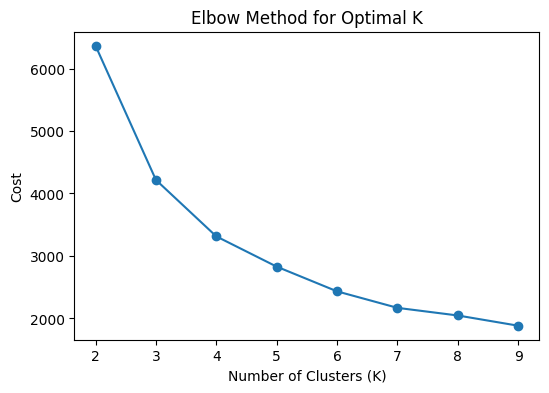

In [ ]:
#  Vẽ đồ thị Elbow
plt.figure(figsize=(6,4))
plt.plot(ks, costs, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
optimal_k = 5
kmeans = KMeans(featuresCol="scaled_features", k=optimal_k, seed=42)
model = kmeans.fit(df_rfm_scaled)
df_rfm_clustered = model.transform(df_rfm_scaled)

In [ ]:
df_rfm_clustered.select("Member_number", "Recency", "Frequency", "Monetary", "prediction").show(10)

+-------------+-------+---------+------------------+----------+
|Member_number|Recency|Frequency|          Monetary|prediction|
+-------------+-------+---------+------------------+----------+
|         1697|     43|       14| 78.66000000000003|         2|
|         1806|    177|        9|109.22000000000001|         0|
|         3764|     50|       11| 70.80000000000001|         2|
|         2927|    330|       10| 60.36000000000001|         0|
|         1950|     49|        8|             43.35|         4|
|         4894|      7|        8|              81.0|         2|
|         2509|    168|        7|             105.1|         0|
|         2040|     84|       15|             140.0|         1|
|         2250|     76|        8|              73.4|         2|
|         2453|      9|       14|            114.69|         2|
+-------------+-------+---------+------------------+----------+
only showing top 10 rows



In [ ]:
df_rfm_clustered.groupBy("prediction").agg(
    {"Recency": "mean", "Frequency": "mean", "Monetary": "mean"}
).show()

+----------+------------------+------------------+------------------+
|prediction|      avg(Recency)|     avg(Monetary)|    avg(Frequency)|
+----------+------------------+------------------+------------------+
|         1| 91.93827160493827|182.84107583774247|16.012345679012345|
|         3|453.27910447761195|  35.5220447761194| 4.308955223880597|
|         4|126.06558935361217|  45.5374144486692| 5.692015209125476|
|         2| 69.70370370370371|100.25216216216216| 10.85885885885886|
|         0|284.55573770491804| 92.83885245901648| 9.777049180327868|
+----------+------------------+------------------+------------------+



In [ ]:
# Nhận Xét :
    # - Cluster 0 là nhóm khách hàng VIP, tần suất mua nhiều nhất và chi tiêu cao nhất. Nên có chương trình chăm sóc đặc biệt.

    # - Cluster 1 là nhóm khách hàng có tần suất mua tốt, chi tiêu khá. Nên duy trì và kích thích mua sắm thêm.

    # - Cluster 2 là nhóm khách hàng đã lâu không quay lại. Cần chiến lược tiếp cận lại họ (email marketing, giảm giá, quà tặng).

    # - Cluster 3 có tần suất mua thấp và cũng không chi tiêu nhiều. Nhóm này có thể ít quan tâm đến sản phẩm.

    # - Cluster 4 từng là khách hàng trung thành nhưng đã lâu không mua. Cần nhắc nhở, có thể là khách hàng tiềm năng nếu kích thích mua lại.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df_rfm_pd = df_rfm_clustered.select("Recency", "Frequency", "Monetary", "prediction").toPandas()

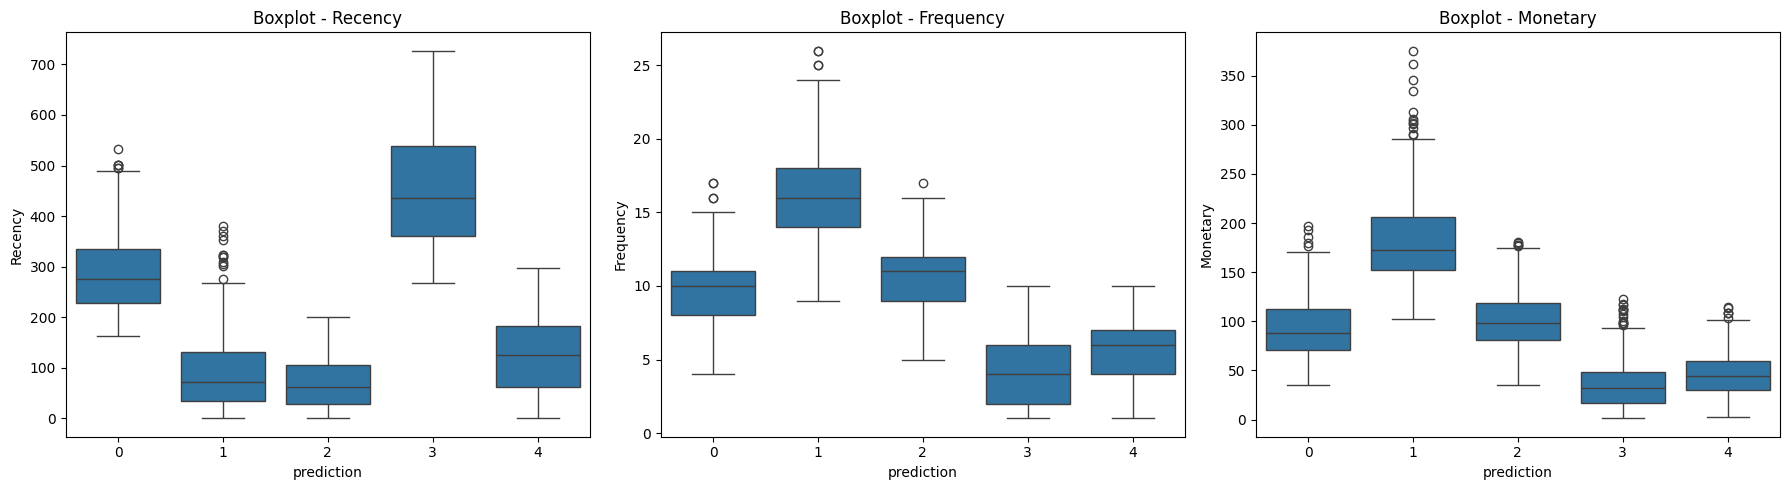

In [ ]:
# Boxplot cho từng giá trị RFM theo cụm
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="prediction", y="Recency", data=df_rfm_pd, ax=axes[0])
axes[0].set_title("Boxplot - Recency")

sns.boxplot(x="prediction", y="Frequency", data=df_rfm_pd, ax=axes[1])
axes[1].set_title("Boxplot - Frequency")

sns.boxplot(x="prediction", y="Monetary", data=df_rfm_pd, ax=axes[2])
axes[2].set_title("Boxplot - Monetary")

plt.tight_layout()
plt.show()

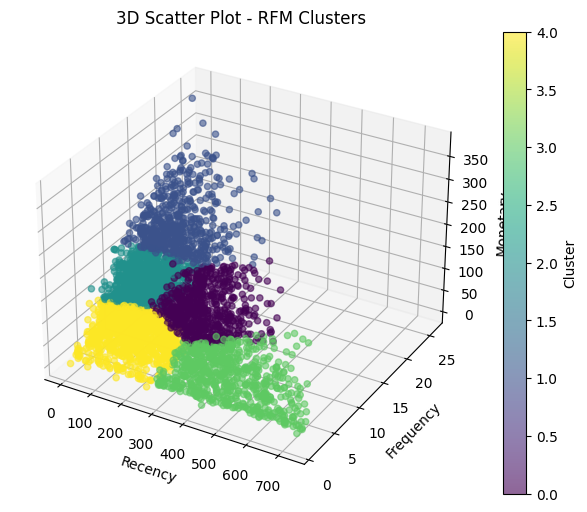

In [ ]:
#  3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Tạo scatter plot
scatter = ax.scatter(df_rfm_pd["Recency"], df_rfm_pd["Frequency"], df_rfm_pd["Monetary"], 
                     c=df_rfm_pd["prediction"], cmap="viridis", alpha=0.6)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("3D Scatter Plot - RFM Clusters")

# Thêm chú thích
plt.colorbar(scatter, ax=ax, label="Cluster")
plt.show()

In [ ]:
# # Nhận Xét :
#     - Cluster 0 là nhóm khách hàng VIP, tần suất mua nhiều nhất và chi tiêu cao nhất. Nên có chương trình chăm sóc đặc biệt.

#     - Cluster 1 là nhóm khách hàng có tần suất mua tốt, chi tiêu khá. Nên duy trì và kích thích mua sắm thêm.

#     - Cluster 2 là nhóm khách hàng đã lâu không quay lại. Cần chiến lược tiếp cận lại họ (email marketing, giảm giá, quà tặng).

#     - Cluster 3 có tần suất mua thấp và cũng không chi tiêu nhiều. Nhóm này có thể ít quan tâm đến sản phẩm.

#     - Cluster 4 từng là khách hàng trung thành nhưng đã lâu không mua. Cần nhắc nhở, có thể là khách hàng tiềm năng nếu kích thích mua lại.



In [ ]:
# Phan tich 6 cum khach hang

In [ ]:
optimal_k = 6
kmeans = KMeans(featuresCol="scaled_features", k=optimal_k, seed=42)
model = kmeans.fit(df_rfm_scaled)
df_rfm_clustered = model.transform(df_rfm_scaled)

In [ ]:
df_rfm_clustered.select("Member_number", "Recency", "Frequency", "Monetary", "prediction").show(10)

+-------------+-------+---------+------------------+----------+
|Member_number|Recency|Frequency|          Monetary|prediction|
+-------------+-------+---------+------------------+----------+
|         1697|     43|       14| 78.66000000000003|         2|
|         1806|    177|        9|109.22000000000001|         2|
|         3764|     50|       11| 70.80000000000001|         2|
|         2927|    330|       10| 60.36000000000001|         5|
|         1950|     49|        8|             43.35|         2|
|         4894|      7|        8|              81.0|         2|
|         2509|    168|        7|             105.1|         2|
|         2040|     84|       15|             140.0|         1|
|         2250|     76|        8|              73.4|         2|
|         2453|      9|       14|            114.69|         1|
+-------------+-------+---------+------------------+----------+
only showing top 10 rows



In [ ]:
df_rfm_clustered.groupBy("prediction").agg(
    {"Recency": "mean", "Frequency": "mean", "Monetary": "mean"}
).show()

+----------+------------------+------------------+------------------+
|prediction|      avg(Recency)|     avg(Monetary)|    avg(Frequency)|
+----------+------------------+------------------+------------------+
|         1|112.37367021276596|135.55416223404268| 13.30718085106383|
|         3| 83.12903225806451|212.38806451612916|17.526881720430108|
|         5| 315.7633711507293| 77.68003241491091|  8.26256077795786|
|         4| 483.4980392156863|30.909745098039185| 3.864705882352941|
|         2| 78.98672114402451|  80.9678140960164| 9.293156281920327|
|         0| 138.2706964520368| 36.80235216819976|4.8646517739816035|
+----------+------------------+------------------+------------------+



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df_rfm_pd = df_rfm_clustered.select("Recency", "Frequency", "Monetary", "prediction").toPandas()

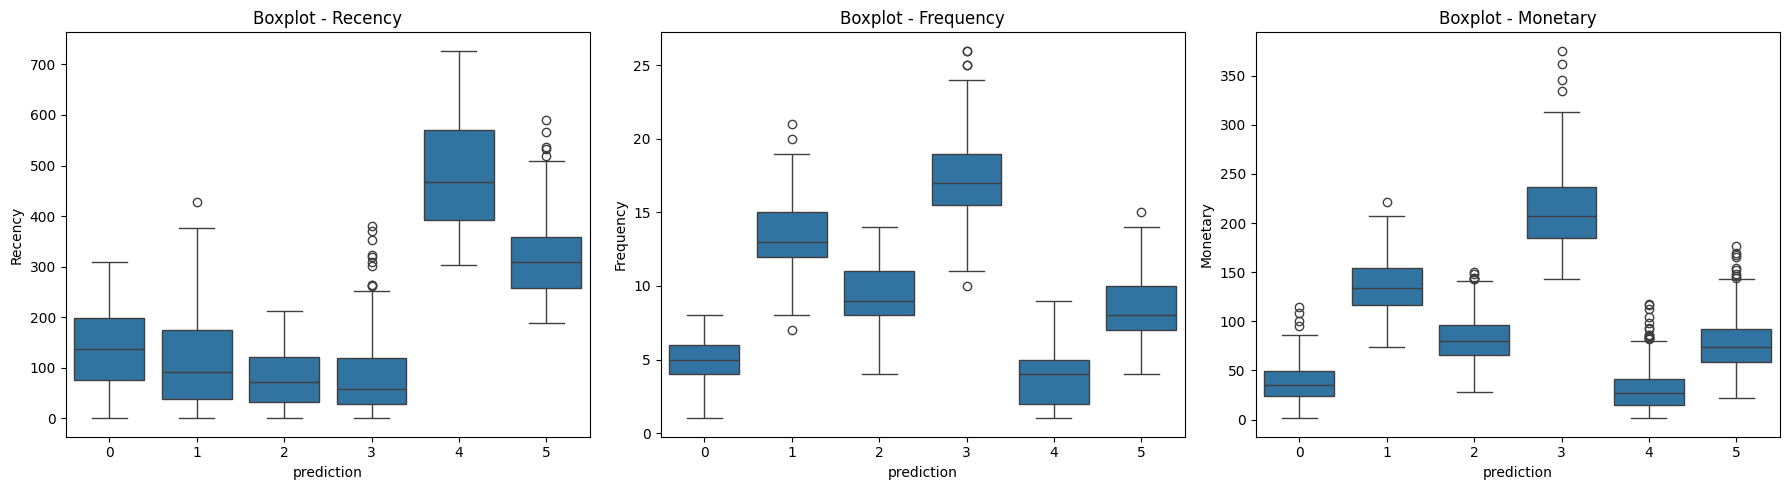

In [ ]:
# Boxplot cho từng giá trị RFM theo cụm
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="prediction", y="Recency", data=df_rfm_pd, ax=axes[0])
axes[0].set_title("Boxplot - Recency")

sns.boxplot(x="prediction", y="Frequency", data=df_rfm_pd, ax=axes[1])
axes[1].set_title("Boxplot - Frequency")

sns.boxplot(x="prediction", y="Monetary", data=df_rfm_pd, ax=axes[2])
axes[2].set_title("Boxplot - Monetary")

plt.tight_layout()
plt.show()

In [ ]:
# Nhận xét: có sự phân tách tốt hơn giữa các nhóm khi phân thành 6 cụm so với 5 cụm

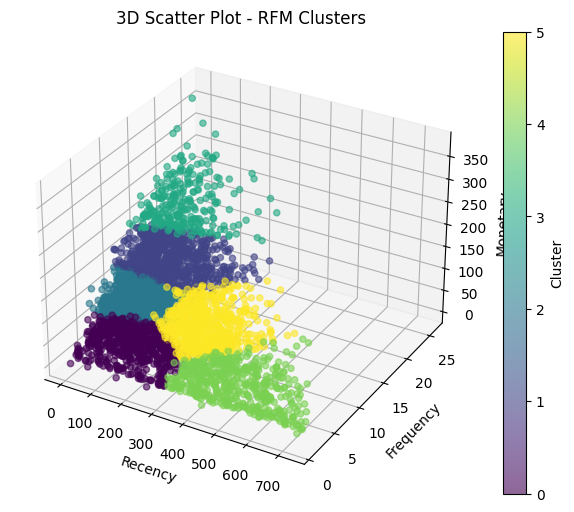

In [ ]:
#  3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Tạo scatter plot
scatter = ax.scatter(df_rfm_pd["Recency"], df_rfm_pd["Frequency"], df_rfm_pd["Monetary"], 
                     c=df_rfm_pd["prediction"], cmap="viridis", alpha=0.6)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("3D Scatter Plot - RFM Clusters")

# Thêm chú thích
plt.colorbar(scatter, ax=ax, label="Cluster")
plt.show()